In [92]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as linalg
import sklearn.preprocessing as preproc
import sklearn.pipeline as pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
import sklearn
%matplotlib inline

In [93]:
df = pd.read_csv("./train.csv")

In [94]:
df

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1


In [95]:
fig = px.histogram(df, x='default')
fig.update_layout(width = 400, height = 400)
fig.show()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [97]:
m = df.education.mode()[0]
df.education.fillna(m, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73799 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [98]:
train, validation = train_test_split(df, test_size=0.33, random_state=42)

/home/bvg/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



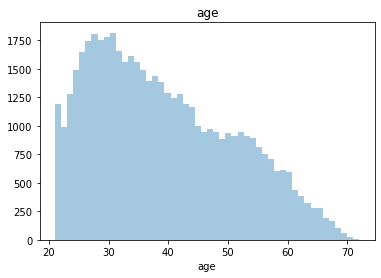

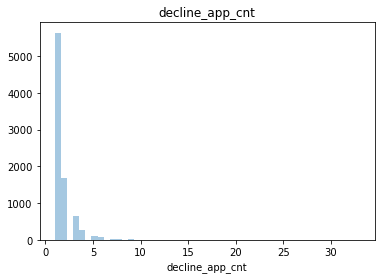

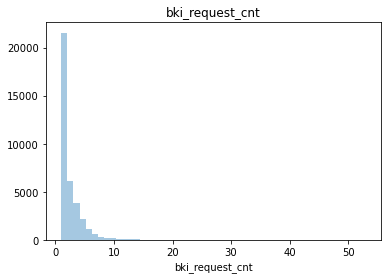

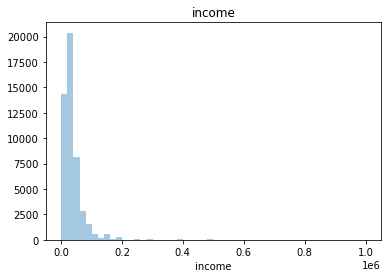

In [99]:
#бинарные переменные 
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

#числовые переменные

num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']


for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

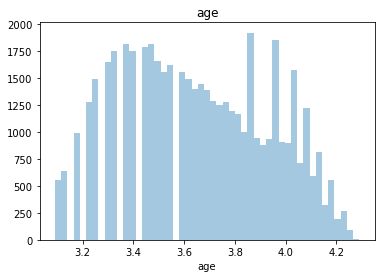

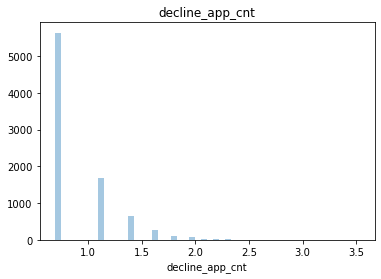

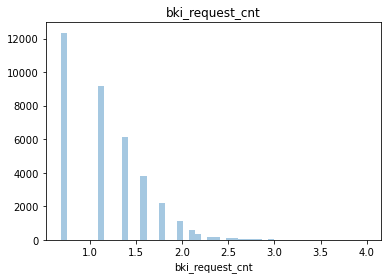

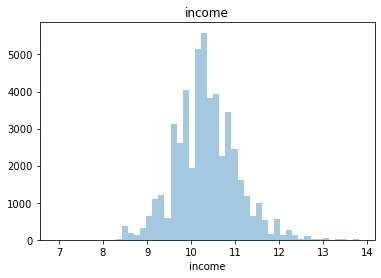

In [100]:
for i in num_cols:
    plt.figure()
    sns.distplot(np.log(train[i][train[i] > 0].dropna()+1), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [101]:
for i in num_cols:
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Default", "Not Default"))
    fig.add_trace(
        go.Box(x = train[i][train.default==1]), row=1, col=1
    )
    fig.add_trace(
        go.Box(x = train[i][train.default==0]), row=1, col=2
    )    
    fig.update_layout(width = 1000, height = 300, title = i)
    fig.show()

In [102]:
corr = train[num_cols].corr().abs()
fig = px.imshow(corr)
fig.update_layout(width = 800, height = 700)
fig.show()

<AxesSubplot:>

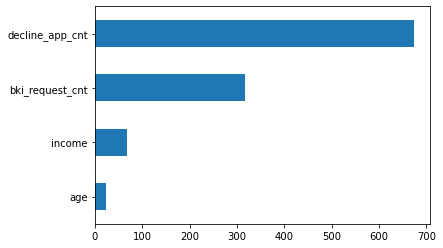

In [103]:
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [104]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = preproc.LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
# убедимся в преобразовании    
train.head()

/tmp/ipykernel_89014/133363264.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
8931,104346,GRD,0,27,0,0,0,0,3,2,3,30000,0,0
63915,56248,GRD,0,47,0,0,0,0,4,1,2,20000,0,0
45568,59433,SCH,0,47,0,0,0,0,0,2,3,45000,0,0
3391,21096,SCH,0,32,0,0,0,0,3,2,3,21000,0,1
40660,18878,SCH,0,31,0,0,0,1,6,2,3,30000,1,0


In [105]:
education_encoder = preproc.LabelEncoder()
train.education = education_encoder.fit_transform(train.education)

/home/bvg/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

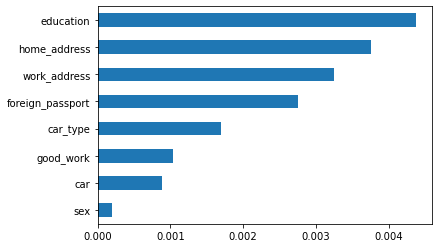

In [106]:
imp_cat = pd.Series(sklearn.feature_selection.mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [107]:
X_cat = preproc.OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
X_cat.shape

(49445, 11)

In [108]:
# Стандартизация числовых переменных

X_num = preproc.StandardScaler().fit_transform(train[num_cols].values)

In [109]:
X_train = np.hstack([X_num, train[bin_cols].values, X_cat])
y_train = train['default'].values

In [110]:
def prepare(raw_data, scaler, oneHotEnc):
    
    #бинарные переменные 
    bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
    #категориальные переменные
    cat_cols = ['education', 'work_address', 'home_address']
    #числовые переменные
    num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

    label_encoder = preproc.LabelEncoder()

    for column in bin_cols:
        raw_data[column] = label_encoder.fit_transform(raw_data[column])

    education_encoder = preproc.LabelEncoder()
    raw_data.education = education_encoder.fit_transform(raw_data.education)

    print(raw_data[cat_cols].isna().sum())

    X_cat = oneHotEnc.fit_transform(raw_data[cat_cols].values)
    
    X_num = scaler.transform(raw_data[num_cols].values)

    X = np.hstack([X_num, raw_data[bin_cols].values, X_cat])
    y = raw_data['default'].values
    return (X, y)

In [111]:
def print_metrics(y_pr, y_true):
    print('confusion matrix:')
    print(sklearn.metrics.confusion_matrix(y_true,y_pr))
    print(f'accuracy: {sklearn.metrics.accuracy_score(y_true,y_pr)}')
    print(f'precision: {sklearn.metrics.precision_score(y_true,y_pr)}')
    print(f'recall: {sklearn.metrics.recall_score(y_true,y_pr)}')
    print(f'f1 score: {sklearn.metrics.f1_score(y_true,y_pr)}')
    print(f'ROC_AUC score: {sklearn.metrics.roc_auc_score(y_true,y_pr)}')

In [140]:
train, validation = train_test_split(df, test_size=0.33, random_state=42)
oneHotEnc = preproc.OneHotEncoder(sparse = False)
oneHotEnc.fit(train[cat_cols].values)
scaler = preproc.StandardScaler()
scaler.fit(train[num_cols].values)
x_valid, y_valid = prepare(validation, scaler, oneHotEnc)
model = sklearn.linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(x_valid).T[1]
y_pred_bin = np.vectorize(np.int)(y_pred>=0.1)


/tmp/ipykernel_89014/4063354479.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/bvg/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



education       0
work_address    0
home_address    0
dtype: int64


/home/bvg/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/tmp/ipykernel_89014/1609093349.py:10: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.ht

In [125]:
display(y_pred.mean())
display(y_valid.mean())

0.0028742711669540936

0.12564671101256467

In [141]:
print_metrics(y_pred_bin, y_valid)

confusion matrix:
[[ 8663 12631]
 [  591  2469]]
accuracy: 0.45709123757904246
precision: 0.16350993377483444
recall: 0.8068627450980392
f1 score: 0.2719162995594714
ROC_AUC score: 0.6068454798092807


In [126]:
y_pr_tr = model.predict(X_train)
print_metrics(y_pr_tr,y_train)

confusion matrix:
[[43054    79]
 [ 6260    52]]
accuracy: 0.8717969461017292
precision: 0.3969465648854962
recall: 0.008238276299112801
f1 score: 0.01614154896787211
ROC_AUC score: 0.5032033660029402


In [127]:
model = sklearn.linear_model.LogisticRegression()

iter_ = 50
epsilon_stop = 1e-3

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

## model ваша модель логистической регрессии
gridsearch = sklearn.model_selection.GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_

##печатаем параметры
best_parameters = model.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))


/home/bvg/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bvg/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bvg/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/bvg/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/bvg/anaconda3/lib/python3.9/site-packages/s

	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 50
	multi_class: 'auto'
	n_jobs: None
	penalty: 'l2'
	random_state: None
	solver: 'saga'
	tol: 0.001
	verbose: 0
	warm_start: False


/home/bvg/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [128]:
logreg = sklearn.linear_model.LogisticRegression(C = 1.0,
	class_weight = 'balanced',
	dual= False,
	fit_intercept = True,
	intercept_scaling = 1,
	l1_ratio = None,
	max_iter = 500,
	multi_class = 'auto',
	n_jobs = None,
	penalty = 'l2',
	random_state = None,
	solver = 'saga',
	tol = 0.001,
	verbose = 0,
	warm_start = False)
logreg.fit(X_train,y_train)
y_pr = logreg.predict(x_valid)
print_metrics(y_pr,y_valid)

confusion matrix:
[[12924  8370]
 [ 1119  1941]]
accuracy: 0.6103720128110373
precision: 0.1882455629909805
recall: 0.634313725490196
f1 score: 0.29032981826340587
ROC_AUC score: 0.6206226277493245


In [142]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_valid, y_pr)

In [144]:
display(classification_report)

'              precision    recall  f1-score   support\n\n           0       0.92      0.61      0.73     21294\n           1       0.19      0.63      0.29      3060\n\n    accuracy                           0.61     24354\n   macro avg       0.55      0.62      0.51     24354\nweighted avg       0.83      0.61      0.68     24354\n'